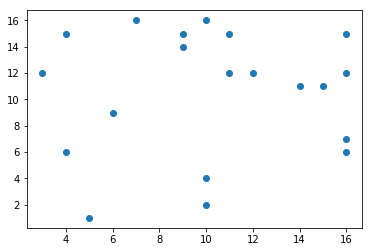

'\nNotice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!\n'

In [50]:
"""
The purpose of an unsuper. learning model is to find patterns in data that are not labeled,
classified or characterized using a dedicated algorithm. The objective for the algorithm is to interpret any structure in 
the data that might lead to the constitution of groups / underlying patterns between objects that share similarities,
or similar / close characteristics.


As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data.
"""

# Import plotting class from matplotlib library
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/Cluster Analysis in Python/data/'

x = np.random.randint(1, 17, size=20)
y = np.random.randint(1, 17, size=20)

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

"""
Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!
"""


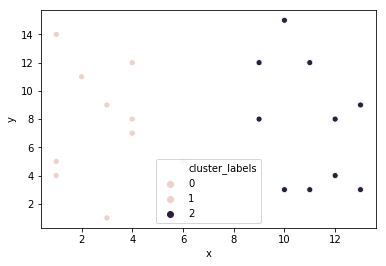

    x   y  cluster_labels
0  11   3               2
1  10   3               2
2  12   4               2
3  13   9               2
4  11  12               2


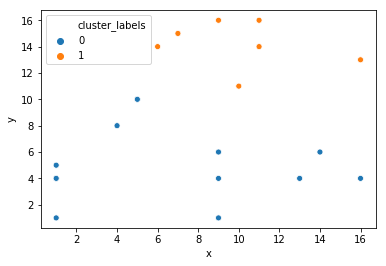

      x     y  cluster_labels
0   1.0   5.0               0
1   5.0  10.0               0
2   9.0   4.0               0
3  11.0  14.0               1
4   9.0  16.0               1


In [3]:
"""
Cluster Analysis
Group of items with similar characteristics
Tools include : DBScan, K-Means, Hierarchical clustering, Gaussian Methods...
"""

"""
Notice that the cluster labels are plotted with different colors. You will notice that the resulting plot has
an extra cluster labelled 0 in the legend. This will be explained later in the course.
"""

"""
With Hierarchical clustering
"""
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd
import numpy as np
import seaborn as sns

x = np.random.randint(1, 17, size=20)
y = np.random.randint(1, 17, size=20)

df = pd.DataFrame({'x':x, 'y':y})

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

print(df.head())




"""
With k-means
"""
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

x = np.random.randint(1, 17, size=20)
y = np.random.randint(1, 17, size=20)

x = x.astype('float')
y = y.astype('float')

df = pd.DataFrame({'x':x, 'y':y})

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

print(df.head())

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


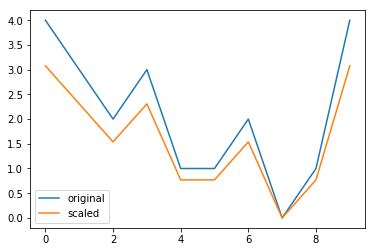

[0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]
[ 1.7948954   0.71795816 -0.35897908 -0.71795816 -0.35897908  1.7948954
 -0.71795816 -1.07693724 -0.71795816  0.35897908]


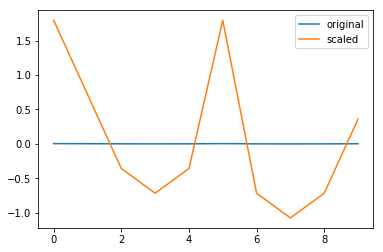

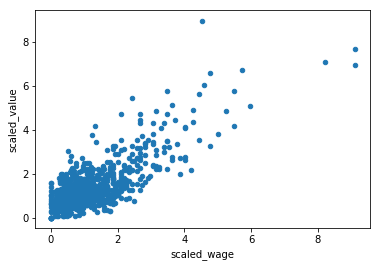

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [4]:
"""
Very import to normalize the data before using this (any) kind of algorithm, if not can lead to import bias, especially
on very large scale variables. Because variables can have different units, scales, distances etc.

Normalizing data is the processing of rescaling data to a standard deviation of 1.
"""

# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

"""
Normalization of small numbers
In earlier examples, you have normalization of whole numbers. In this exercise, 
you will look at the treatment of fractional numbers - the change of interest rates in the country 
of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt
"""

# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

print(rate_cuts)
print(scaled_data)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()








import pandas as pd
import os, sys

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Python/Cluster Analysis in Python/data/')
fifa = pd.read_csv('fifa_18_sample_data.csv')

# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

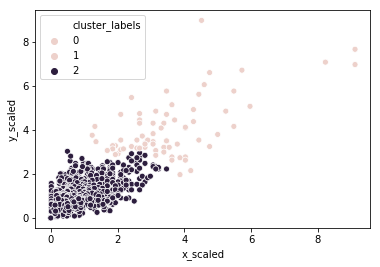

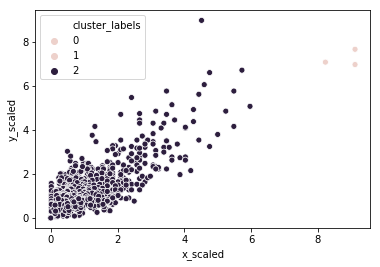

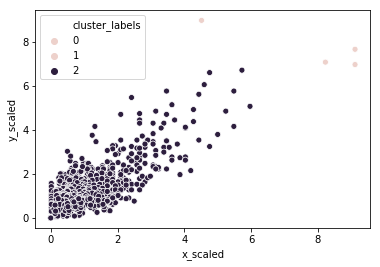

'\nCoincidentally, the clusters formed are not different from the single methods.\nNext, let us learn how to visualize clusters.\n'

In [5]:
"""

HIERARCHICAL CLUSTERING


Which method should use?
single: based on two closest objects
complete: based on two farthest objects
average: based on the arithmetic mean of all objects
centroid: based on the geometric mean of all objects
median: based on the median of all objects
ward: based on the sum of squares
"""

import pandas as pd
import os, sys

os.chdir('C:/Users/T0230575/source/repos/DataCamp__/Python/Cluster Analysis in Python/data/')
comic_con = pd.read_csv('fifa_18_sample_data.csv')

# Scale wage and value
comic_con['x_scaled'] = whiten(comic_con['eur_wage'])
comic_con['y_scaled'] = whiten(comic_con['eur_value'])

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()




"""
With 'single' method, a difference noted
Notice that in this example, the clusters formed are different from the ones created using the ward method.
"""

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion = 'maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()



"""
Now the 'complete' method
"""

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled','y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion = 'maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

"""
Coincidentally, the clusters formed are not different from the single methods.
Next, let us learn how to visualize clusters.
"""

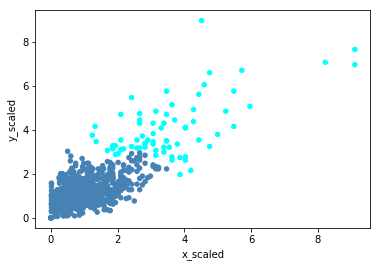

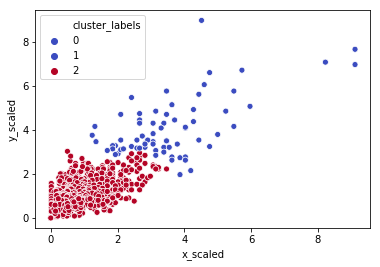

In [6]:
# Import the pyplot class
from matplotlib import pyplot as plt


# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Define a colors dictionary for clusters
colors = {1:'cyan',2:'steelblue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled', c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()


# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con,
               palette = "coolwarm")
plt.show()


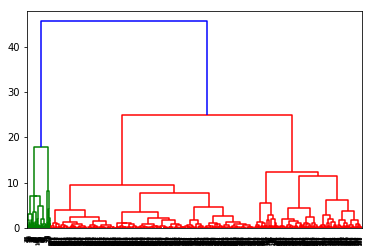

In [7]:
"""
How many clusters is optimal ?
Dendrogram helps visualizing this, the distance between clusters horizontally (the inter-cluster distance) indicates how
much clusters carry information; if clusters are far apart, they carry different data points, if they are very close,
they more likely carry the same data points relatively speaking.

Vertically, we can read the number of clusters.

"""

from scipy.cluster.hierarchy import dendrogram

Z = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')
dn = dendrogram(Z)
plt.show()


       sliding_tackle   aggression
count     1000.000000  1000.000000
mean         1.999313     3.659638
std          1.000500     1.000500
min          0.303922     0.612119
25%          0.987747     3.116243
50%          2.279416     3.895304
75%          2.963240     4.410040
max          3.457114     5.342131
                sliding_tackle  aggression
cluster_labels                            
1                     2.837810    4.280968
2                     0.579966    1.766698
3                     1.166930    3.415214


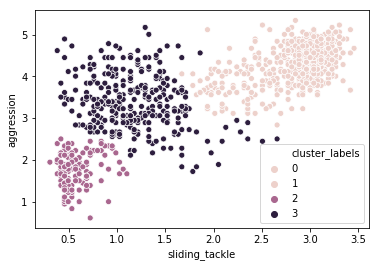

In [62]:
import numpy as np
import random
import pandas as pd
from scipy.cluster.vq import whiten

points = 40
x = np.array(random.sample(range(0, points), points))

os.chdir(path)
fifa = pd.read_csv('fifa_18_sample_data.csv')

fifa['sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['aggression'] = whiten(fifa['aggression'])

cols = ['sliding_tackle','aggression']
print(fifa[cols].describe())

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['sliding_tackle', 'aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['sliding_tackle', 'aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='sliding_tackle', y='aggression', hue='cluster_labels', data=fifa)
plt.show()


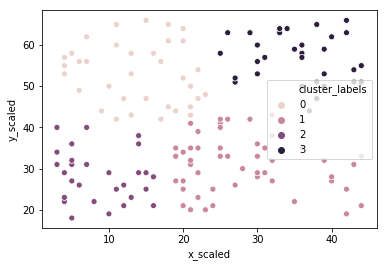

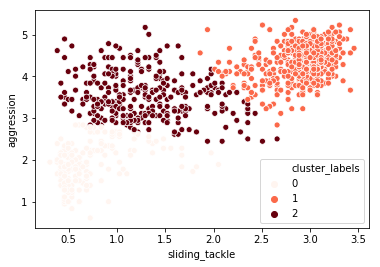

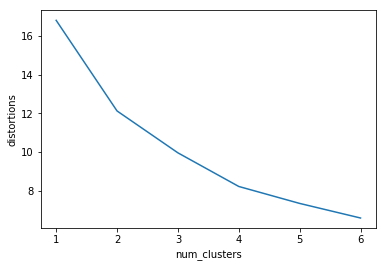

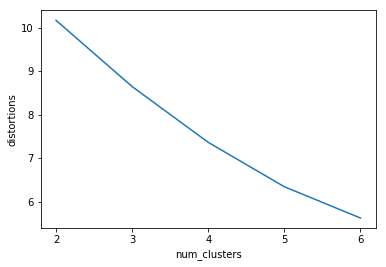

In [95]:
"""

K-MEANS CLUSTERING

"""

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

os.chdir(path)
comic_con = pd.DataFrame({'x_scaled': np.random.randint(3, 45, size = 150).astype('float'),
                          'y_scaled': np.random.randint(18, 67, size = 150).astype('float')})

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], 4)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']], cluster_centers) 

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()




# Generate cluster centers
cluster_centers, distortion = kmeans(fifa[['sliding_tackle','aggression']], 3)

# Assign cluster labels
fifa['cluster_labels'], distortion_list = vq(fifa[['sliding_tackle','aggression']], cluster_centers) 

# Plot clusters
sns.scatterplot(x='sliding_tackle', y='aggression', 
                hue='cluster_labels', palette = 'Reds', data = fifa)
plt.show()





"""

How many optimal clusters ?
> Elbow plot, gap statistic, average silhouette

"""


distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()



"""
Sometimes, elbow plot can be very hard to determine.
"""

uniform_data = pd.DataFrame({'x_scaled': np.random.randint(1, 50, 200).astype('float'),
                             'y_scaled' : np.random.randint(1, 30, 200).astype('float')})

distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()



distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters' : num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()


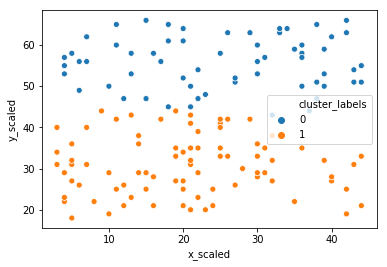

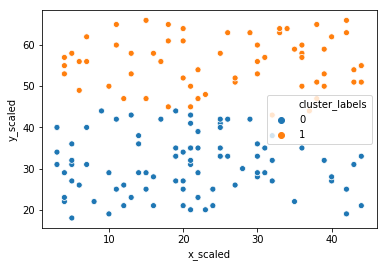

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


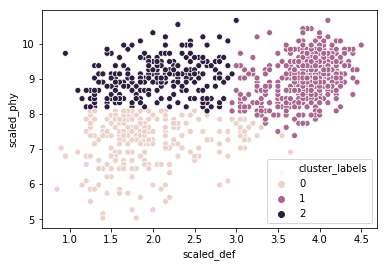

In [101]:
"""
Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise,
you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

"""

# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()





# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()


"""
Notice that the plots have not changed after changing the seed as the clusters are well-defined.
"""

"""
Limits of clustering.


Uniform clustering patterns
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering
towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points 
that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for
the face and two ears of a mouse.
"""

# # Import the kmeans and vq functions
# from scipy.cluster.vq import kmeans, vq

# # Generate cluster centers
# cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']], 3)

# # Assign cluster labels
# mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']], cluster_centers)

# # Plot clusters
# sns.scatterplot(x='x_scaled', y='y_scaled', 
#                 hue='cluster_labels', data = mouse)
# plt.show()


"""
Notice that kmeans is unable to capture the three visible clusters clearly, 
and the two clusters towards the top have taken in some points along the boundary. This happens due
to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that
are similar in terms of area.

"""


fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

"""
Notice that the seed has an impact on clustering as the data is uniformly distributed.

"""

In [ ]:
"""
Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

Extract RGB values into three lists.
Perform k-means clustering on scaled RGB values.
Display the colors of cluster centers.
To extract RGB values, we use the imread() function of the image class of matplotlib. Empty lists, r, g and b
have been initialized.

For the purpose of finding dominant colors, we will be using the following image.
"""

# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
"""
You have successfully extracted the RGB values of the image into three lists, one for each color channel.
"""


distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue','scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters' : num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()


"""
Notice that there are three distinct colors present in the image, which is supported by the elbow plot.
"""

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

In [115]:
"""
Document clustering
"""

import pandas as pd
import numpy as np
import seaborn as sns
import sys, os

os.chdir(path)
df = pd.read_csv('movies_plot.csv')
print(df.head())
print(df.info())

"""
TF-IDF of movie plots
Let us use the plots of randomly selected movies to perform document clustering on. Before performing
clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and
stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the TfidfVectorizer class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise()
function is available to use as a tokenizer in the TfidfVectorizer class. The .fit_transform() method fits the
data into the TfidfVectorizer objects and then generates the TF-IDF sparse matrix.
"""

# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
                                   min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)



"""
Top terms in movie clusters
Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster.
Use the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function
to process. Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. 
The zip() function in Python joins two lists.

The tfidf_vectorizer object and sparse matrix, tfidf_matrix, from the previous have been retained in this exercise.
kmeans has been imported from SciPy.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some
computational power, making it difficult to accomplish in an exercise here.
"""

num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

    
        


                       Title  \
0  The Ballad of Cable Hogue   
1        Monsters vs. Aliens   
2           The Bandit Queen   
3               Broken Arrow   
4                   Dolemite   

                                                Plot  
0  Cable Hogue is isolated in the desert, awaitin...  
1  In the far reaches of space, a planet explodes...  
2  Zarra Montalvo is the daughter of an American ...  
3  Major Vic Deakins (John Travolta) and Captain ...  
4  Dolemite is a pimp and nightclub owner who is ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Title    1000 non-null object
Plot     1000 non-null object
dtypes: object(2)
memory usage: 15.7+ KB
None


NameError: name 'remove_noise' is not defined

In [117]:
"""
What should you do if you have too many features for clustering?
>>> Reduce features using a technique like Factor Analysis


Basic checks on clusters
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on
attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are
present in attack minded players. In this exercise, k-means clustering has already been applied on the data
using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a Pandas data frame, fifa. The scaled column names are present in a list scaled_features.
The cluster labels are stored in the cluster_labels column. Recall the .count() and .mean() methods in Pandas
help you find the number of observations and mean of observations in a data frame.
"""

# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())


"""
In this example, the cluster sizes are not very different, and there are no significant differences
that can be seen in the wages. Further analysis is required to validate these clusters.
"""

# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])


    
"""
The data was sorted before you performed the clustering. Notice the top players in each cluster are representative
of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the 
other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is
known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.
"""



cluster_labels
0    242
1    501
2    257
Name: ID, dtype: int64
cluster_labels
0    67971.074380
1    69043.912176
2    71564.202335
Name: eur_wage, dtype: float64


NameError: name 'scaled_features' is not defined